<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link = "/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Controles/Copia de sensor lb.csv"
dataset = pd.read_csv(link, sep = ";")
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [3]:
dataset['RUL'] = dataset.max_ciclo - dataset.ciclo
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down,RUL
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,187


In [4]:
col_elim = ['max_ciclo', 'count_down']
dataset = dataset.drop(columns = col_elim, axis = 1)

In [7]:
dataset = dataset.query("Activo_id <= 20")

In [8]:
# Matriz de características
X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]

In [9]:
#Division en conjunto de entrenamiento y testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

Creación de modelo

In [11]:
from sklearn.ensemble import RandomForestRegressor
modelo_regresion = RandomForestRegressor(n_estimators = 100,random_state = 0, max_depth = 11)
modelo_regresion.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [12]:
# Predicción de los modelos
y_pred = modelo_regresion.predict(X_test)
y_pred[:10]

array([ 44.01143497, 133.45977585,  28.28993615, 124.5222228 ,
       181.21506888, 114.34670935,  78.6298942 ,  78.54207283,
       138.33752223, 211.98973612])

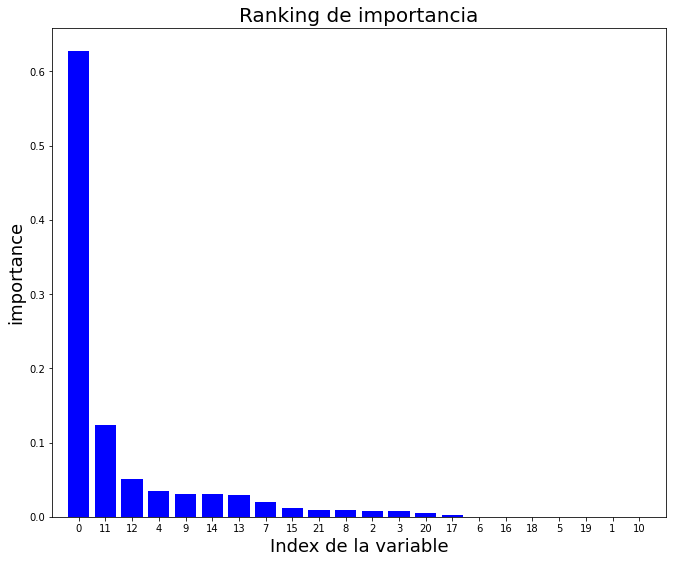

ciclo    0.627550
s11      0.123163
s12      0.050334
s4       0.035217
s9       0.030885
s14      0.030708
s13      0.029306
s7       0.019383
s15      0.011577
s21      0.009498
dtype: float64


In [16]:
# Visualización de impotancia de las variables
importances = modelo_regresion.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
f, ax = plt.subplots(figsize = (11,9))
plt.title("Ranking de importancia", fontsize = 20)
plt.bar(range(X.shape[1]),importances[indices], color = 'b',align = 'center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1,X.shape[1]])
plt.ylabel("importance",fontsize = 18)
plt.xlabel("Index de la variable", fontsize = 18)
plt.show()

#Listar ls variables mas importantes
important_features = pd.Series(data = modelo_regresion.feature_importances_, index = X.columns)
important_features.sort_values(ascending = False, inplace = True)
print(important_features.head(10))


In [18]:
comparativa = np.concatenate([Y_test.values.reshape(-1,1), y_pred.reshape(-1,1)], axis = 1)
comparativa = pd.DataFrame(comparativa, columns = ['Real','Modelo'])
comparativa.head()

,Real,Modelo
0,52.0,44.011435
1,176.0,133.459776
2,25.0,28.289936
3,131.0,124.522223
4,264.0,181.215069


In [20]:
comparativa.corr()

,Real,Modelo
Real,1.000000,0.937788
Modelo,0.937788,1.000000


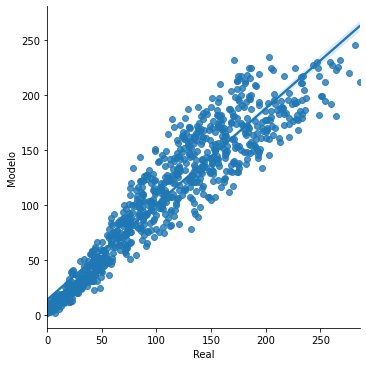

In [24]:
import seaborn as sns
sns.lmplot(data = comparativa, x = "Real", y = 'Modelo')

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(Y_test, y_pred))
print(mean_squared_error(Y_test,y_pred))
print(modelo_regresion.score(X_test,Y_test))

17.610030522103024
533.2129242525103
0.8793654115832722


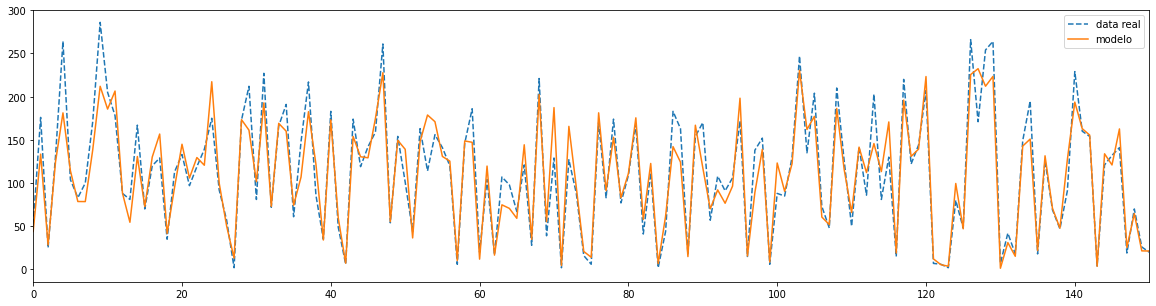

In [26]:
#Visualización de los datos
plt.figure(figsize = (20,5))
plt.plot(np.arange(len(Y_test)),(Y_test),label = 'data real',ls = '--')
plt.plot(np.arange(len(Y_test)),y_pred, label = 'modelo')

plt.xlim(0,150)
plt.legend()